In [1]:
# from netgen.meshing import *
# from netgen.csg import *
from dataclasses import dataclass
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# from ngsolve import ngsglobals
# ngsglobals.msg_level = 2

# from ngsolve import Draw
# import netgen.gui
# %gui tk

In [2]:
# Good
# https://pypi.org/project/pygmsh/

# Read Mesh

In [3]:
@dataclass
class PyEITMesh3D:
    node: np.ndarray
    element: np.ndarray
    vertex: np.ndarray
    perm_array: np.ndarray
    el_pos: None


@dataclass
class PyEITAnomaly_Circle:
    center: Union[np.ndarray, list]
    perm: "float" = 1.0
    r: "float" = 0.1


@dataclass
class PyEITAnomaly_Ball:
    center: Union[np.ndarray, list]
    perm: "float" = 1.0
    r: "float" = 0.1


def load_mesh(path: str) -> PyEITMesh3D:
    """
    load a .mesh file and return the PyEITMesh3d dataclass object.
    """

    el_pos = None

    with open(path) as f:
        lines = f.readlines()
    l1 = int(lines[0].split()[0])
    l2 = int(lines[l1 + 1].split()[0])

    node = np.array(
        [[float(val) for val in values.split()] for values in lines[1 : l1 + 1]]
    )
    element = (
        np.array(
            [
                [int(val) for val in values.split()]
                for values in lines[l1 + 2 : l1 + l2 + 2]
            ]
        )
        - 1
    )
    vertex = (
        np.array(
            [[int(val) for val in values.split()] for values in lines[l1 + l2 + 3 :]]
        )
        - 1
    )
    perm = np.ones(element.shape[0])

    return PyEITMesh3D(node, element[:, 1:], vertex, perm, el_pos)


def plot_elements_2d(mesh: PyEITMesh3D, s: float = 10) -> None:
    x = mesh.node[:, 0]
    y = mesh.node[:, 1]
    plt.scatter(x, y, s=s)
    for eles in mesh.element:
        x_f = mesh.node[eles][:, 0]
        y_f = mesh.node[eles][:, 1]
        plt.fill(x_f, y_f, color="blue", alpha=0.1)
    plt.show()


def plot_nodes_3d(mesh: PyEITMesh3D) -> None:
    x = mesh.node[:, 0]
    y = mesh.node[:, 1]
    z = mesh.node[:, 2]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x, y, z, marker="o")

    # Set labels for the axes
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")

    plt.show()


def set_perm_circle_2D(
    mesh_obj: PyEITMesh3D, anomaly: PyEITAnomaly_Circle
) -> PyEITMesh3D:
    pts = mesh_obj.element
    tri = mesh_obj.node
    perm = mesh_obj.perm_array
    tri_centers = np.mean(tri[pts], axis=1)
    index = (
        np.sqrt(
            (tri_centers[:, 1] - anomaly.center[1]) ** 2
            + (tri_centers[:, 0] - anomaly.center[0]) ** 2
        )
        < anomaly.r
    )

    mesh_obj.perm_array[index] = anomaly.perm  # Zuweisen von 10

    return mesh_obj


def set_perm_circle_3D(
    mesh_obj: PyEITMesh3D, anomaly: PyEITAnomaly_Circle
) -> PyEITMesh3D:
    pts = mesh_obj.element
    tri = mesh_obj.node
    perm = mesh_obj.perm_array
    tri_centers = np.mean(tri[pts], axis=1)
    index = (
        np.sqrt(
            (tri_centers[:, 1] - anomaly.center[1]) ** 2
            + (tri_centers[:, 0] - anomaly.center[0]) ** 2
            + (tri_centers[:, 2] - anomaly.center[2]) ** 2
        )
        < anomaly.r
    )

    mesh_obj.perm_array[index] = anomaly.perm  # Zuweisen von 10

    return mesh_obj


def plot_2D_mesh(mesh_obj: PyEITMesh3D, figsize: tuple = (6, 4), title: str = "mesh"):
    """
    Plot a PyEITMesh3D

    Parameters
    ----------
    mesh : PyEITMesh3D

    """
    plt.style.use("default")
    pts = mesh_obj.node
    tri = mesh_obj.element
    x, y = pts[:, 0], pts[:, 1]
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.tripcolor(
        x,
        y,
        tri,
        np.real(mesh_obj.perm_array),
        edgecolors="k",
        shading="flat",
        alpha=0.5,
        cmap=plt.cm.viridis,
    )
    ax.set_title(title)
    ax.set_aspect("equal")
    fig.set_size_inches(6, 6)
    plt.show()

In [4]:
mesh = load_mesh(path="../3d/2d_square_fine.mesh")

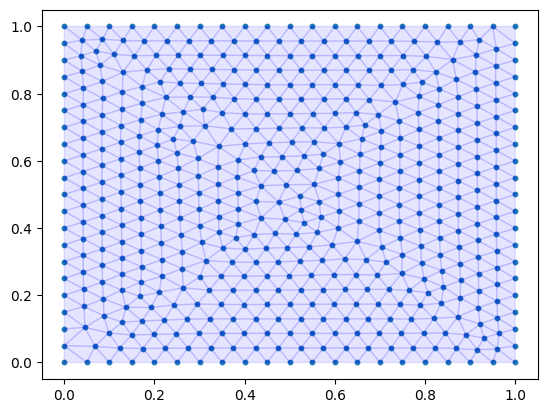

In [5]:
plot_elements_2d(mesh)

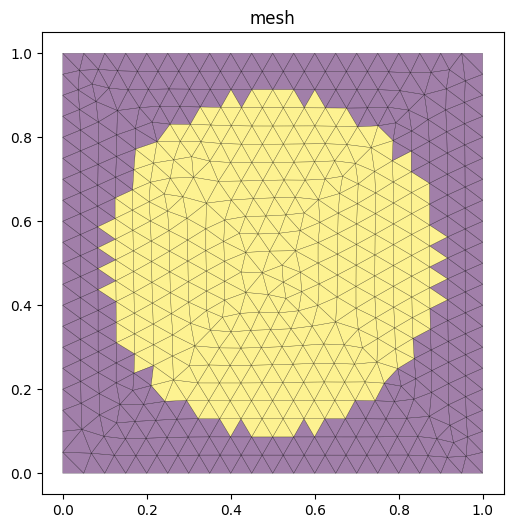

In [6]:
anmly = PyEITAnomaly_Circle(center=[0.5, 0.5], perm=3, r=0.4)

_ = set_perm_circle_2D(mesh, anmly)
plot_2D_mesh(mesh)

In [7]:
mesh = load_mesh(path="../3d/brick_mesh.mesh")

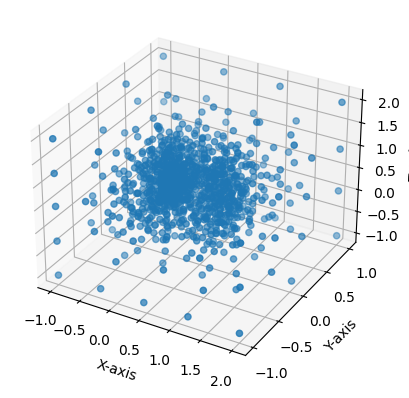

In [8]:
plot_nodes_3d(mesh)

In [ ]:
# https://inverselight.github.io/ValoMC/threedmodel.html